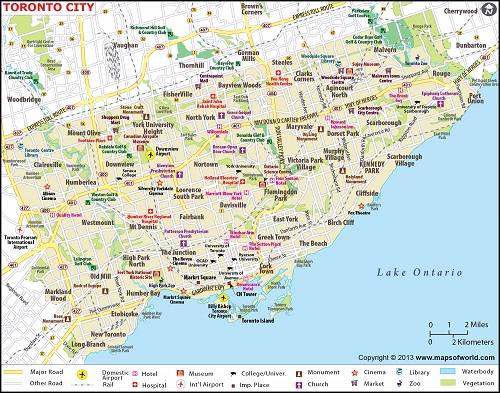

## Segmenting and Clustering Neighborhoods in Toronto




##### Part 1: Creating a dataframe for neighborhoods in Toronto

1. Import libraries 

In [1]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json

!conda install -c conda-forge geopy --yes 

from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
!conda install -c conda-forge beautifulsoup4 --yes
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
 
!conda install -c conda-forge lxml --yes
!conda install -c conda-forge html5lib --yes

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


2. Scrap data from wikipedia page

In [3]:
Data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [4]:
soup = BeautifulSoup(Data, 'lxml')

In [5]:
table = str(soup.table)

In [7]:
df_toronto = pd.read_html(table, header=0)[0]
df_toronto.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


3. Cleaning data

In [8]:
df_toronto = df_toronto[df_toronto.Borough != "Not assigned"]
df_toronto.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [9]:
df_toronto = df_toronto.groupby(["Postal Code","Borough"],sort = False).agg(','.join)
df_toronto.head()

,,Neighbourhood
Postal Code,Borough,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [10]:
df_toronto.reset_index(inplace=True)
df_toronto.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [12]:
df_toronto.shape

(103, 3)